In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [2]:
dfdeaths = pd.read_csv('../data/Casos_Diarios_Municipio_Defunciones_20210620.csv')

In [3]:
a,b = dfdeaths.shape

In [4]:
dfdeaths.head(10)

,cve_ent,poblacion,nombre,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,...,10-06-2021,11-06-2021,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021
0,16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5035,744247,Torreon,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,5036,23781,Viesca,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7012,56971,Berriozabal,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11038,12978,Tarandacuao,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,11039,36574,Tarimoro,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11040,20238,Tierra Blanca,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dfdeaths = dfdeaths.query("nombre != 'Nacional'").copy()

le quitamos nacional

In [6]:
dfdeaths['total'] = dfdeaths.iloc[:,3:b].sum(axis=1)



In [7]:
dfdeaths.head()

,cve_ent,poblacion,nombre,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,...,11-06-2021,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,total
0,16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1,16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5035,744247,Torreon,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1518


In [8]:
dfdeaths.sort_values('total', inplace=True , ascending=False)
dfdeaths.head()

,cve_ent,poblacion,nombre,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,...,11-06-2021,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,total
995,9007,1815551,Iztapalapa,0,0,0,0,0,0,0,...,2,0,2,0,0,0,1,0,0,6904
1930,21114,1698509,Puebla,0,0,0,0,0,0,0,...,1,2,2,3,6,2,2,1,0,6405
1228,15033,1707754,Ecatepec de Morelos,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5328
993,9005,1176967,Gustavo A. Madero,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,5290
988,14039,1503505,Guadalajara,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,4675


In [9]:
dfdeaths['rates'] = (dfdeaths['total']/dfdeaths['poblacion'])*100000
dfdeaths.head()

,cve_ent,poblacion,nombre,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,...,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,total,rates
995,9007,1815551,Iztapalapa,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,6904,380.270232
1930,21114,1698509,Puebla,0,0,0,0,0,0,0,...,2,2,3,6,2,2,1,0,6405,377.095441
1228,15033,1707754,Ecatepec de Morelos,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5328,311.988729
993,9005,1176967,Gustavo A. Madero,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,5290,449.460350
988,14039,1503505,Guadalajara,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,4675,310.940103


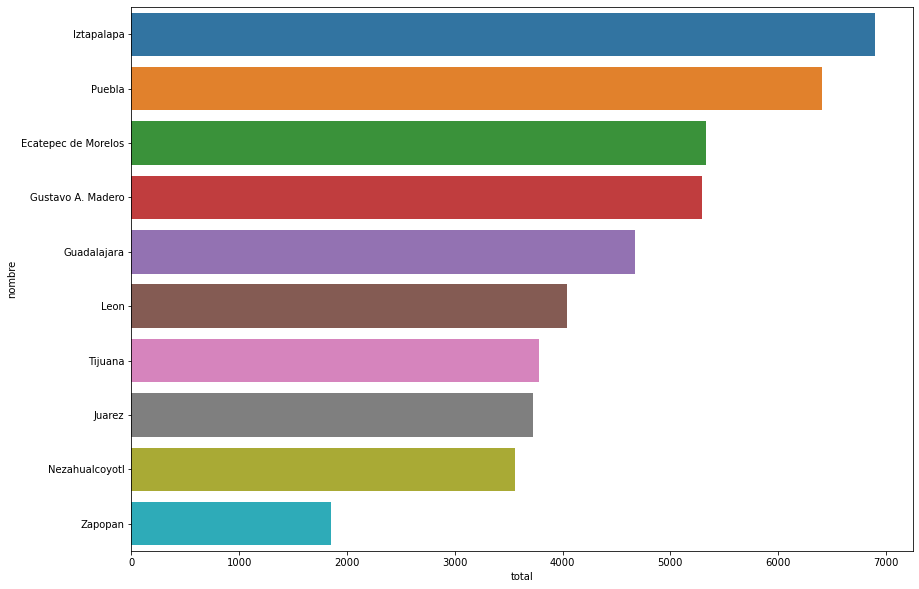

In [10]:
plt.figure(figsize=(14,10))
top10=dfdeaths.nlargest(10,'poblacion').copy()
top10.sort_values('total', inplace=True , ascending=False)
sns.barplot(x="total", y="nombre", data=top10)
sns.set_context('paper',font_scale=2)

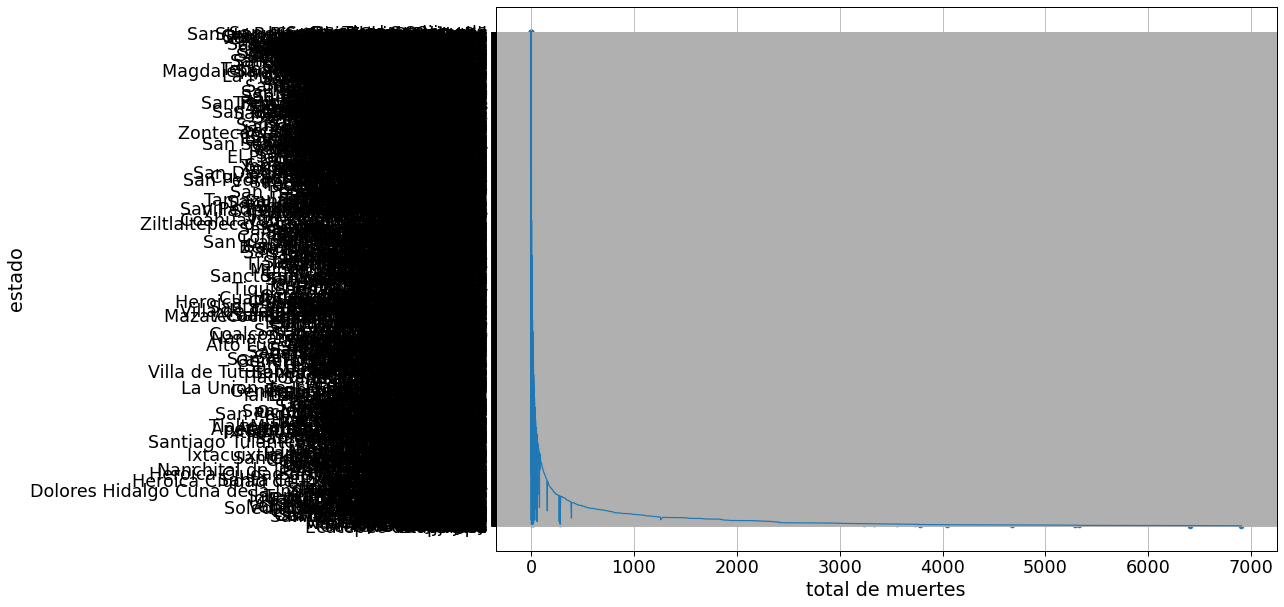

In [11]:
fig = plt.figure(figsize=(14,10))
plt.scatter(dfdeaths['total'],dfdeaths['nombre'])
plt.plot(dfdeaths['total'],dfdeaths['nombre'])
plt.xlabel('total de muertes')
plt.ylabel('estado')
plt.grid()


In [12]:
dfdeaths.keys()

Index(['cve_ent', 'poblacion', 'nombre', '20-01-2020', '21-01-2020',
       '22-01-2020', '23-01-2020', '24-01-2020', '25-01-2020', '26-01-2020',
       ...
       '12-06-2021', '13-06-2021', '14-06-2021', '15-06-2021', '16-06-2021',
       '17-06-2021', '18-06-2021', '19-06-2021', 'total', 'rates'],
      dtype='object', length=522)

In [13]:
X = dfdeaths.iloc[:,:-1].values  #independent variable array
y = dfdeaths.iloc[:,1].values  #dependent variable vector

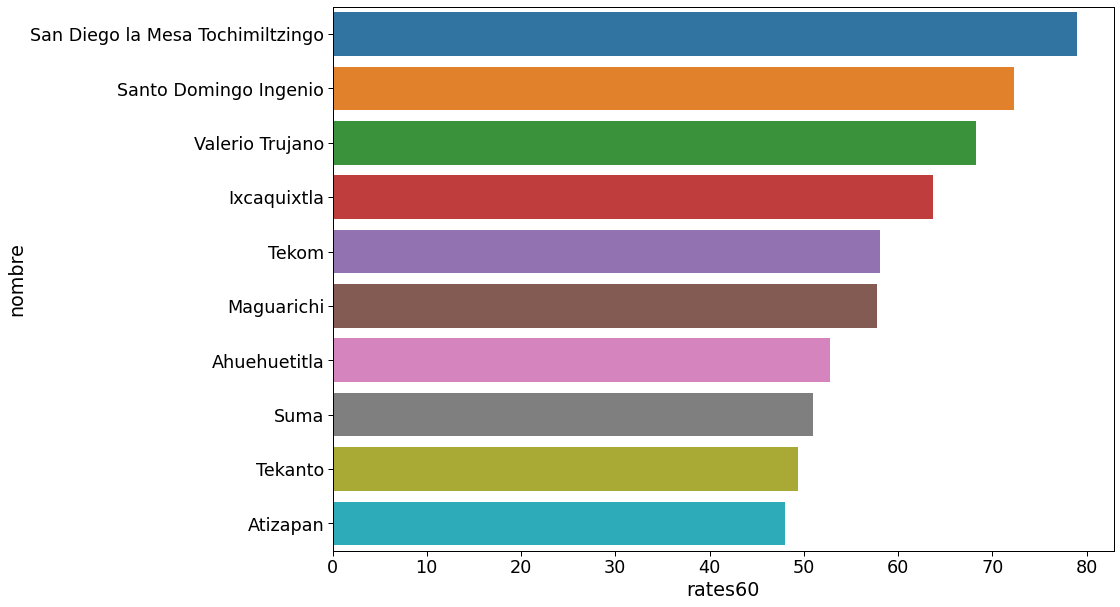

In [14]:
dfdeaths['total60']= dfdeaths.iloc[:, b -59 : b ].sum(axis=1)
dfdeaths['rates60'] = (dfdeaths['total60']/dfdeaths['poblacion'])*100000
dfdeaths
plt.figure(figsize=(14,10))
sns.barplot(x="rates60", y="nombre", data=dfdeaths.nlargest(10, 'rates60'))
sns.set_context('paper', font_scale=2)

#analisis de casos

In [15]:
dfcases = pd.read_csv('../data/Casos_Diarios_Municipio_Confirmados_20210621.csv')

In [16]:
a,b = dfcases.shape

In [17]:
dfcases.head(10)

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,21-06-2021
0,16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5035,744247,Torreon,0,0,0,0,0,0,0,...,1,0,2,1,1,1,1,0,1,0
5,5036,23781,Viesca,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,7012,56971,Berriozabal,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
7,11038,12978,Tarandacuao,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,11039,36574,Tarimoro,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11040,20238,Tierra Blanca,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dfcases = dfcases.query("nombre != 'Nacional'").copy()

le quitamos nacional

In [19]:
dfcases['total'] = dfcases.iloc[:,3:b].sum(axis=1)



In [20]:
dfcases.head()

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,21-06-2021,total
0,16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,177
1,16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,72
2,16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
3,16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,65
4,5035,744247,Torreon,0,0,0,0,0,0,0,...,0,2,1,1,1,1,0,1,0,17371


In [21]:
dfcases.sort_values('total', inplace=True , ascending=False)
dfcases.head()

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,21-06-2021,total
995,9007,1815551,Iztapalapa,0,0,0,0,0,0,0,...,16,83,76,101,95,130,41,14,0,107269
1006,9010,755537,Alvaro Obregon,0,0,0,0,0,0,0,...,7,233,249,255,230,233,119,7,0,89264
993,9005,1176967,Gustavo A. Madero,0,0,0,0,0,0,0,...,19,111,68,50,53,48,40,12,0,76468
1008,9012,682234,Tlalpan,0,0,0,0,0,0,0,...,27,57,73,72,85,71,21,18,0,67264
1930,21114,1698509,Puebla,0,0,0,0,0,0,0,...,19,18,16,22,26,13,11,1,0,54784


In [22]:
dfcases['rates'] = (dfcases['total']/dfcases['poblacion'])*100000
dfcases.head()

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,21-06-2021,total,rates
995,9007,1815551,Iztapalapa,0,0,0,0,0,0,0,...,83,76,101,95,130,41,14,0,107269,5908.344078
1006,9010,755537,Alvaro Obregon,0,0,0,0,0,0,0,...,233,249,255,230,233,119,7,0,89264,11814.643095
993,9005,1176967,Gustavo A. Madero,0,0,0,0,0,0,0,...,111,68,50,53,48,40,12,0,76468,6497.038575
1008,9012,682234,Tlalpan,0,0,0,0,0,0,0,...,57,73,72,85,71,21,18,0,67264,9859.373763
1930,21114,1698509,Puebla,0,0,0,0,0,0,0,...,18,16,22,26,13,11,1,0,54784,3225.417116


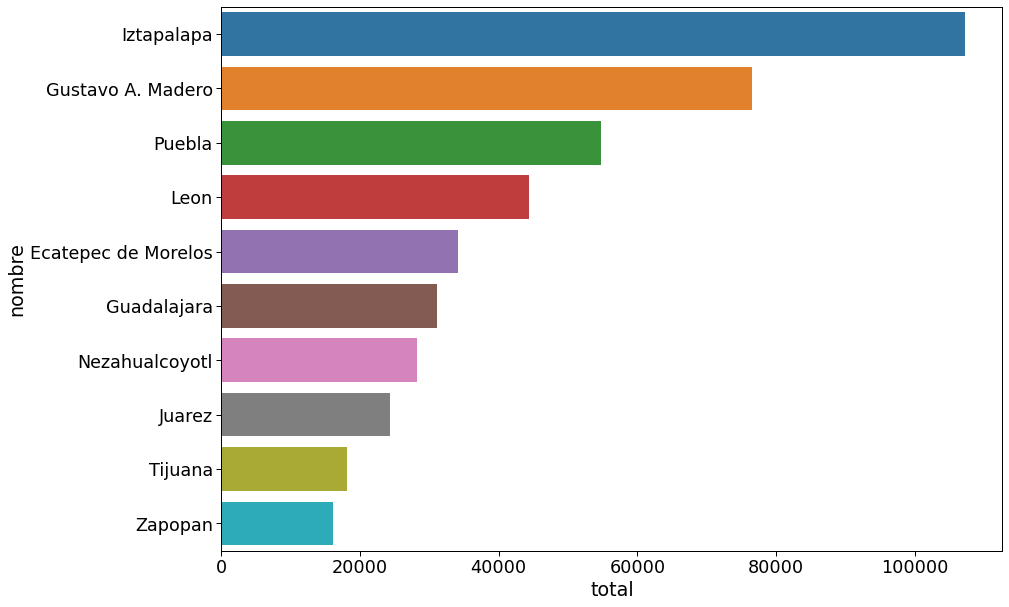

In [23]:
plt.figure(figsize=(14,10))
top10=dfcases.nlargest(10,'poblacion').copy()
top10.sort_values('total', inplace=True , ascending=False)
sns.barplot(x="total", y="nombre", data=top10)
sns.set_context('paper',font_scale=2)

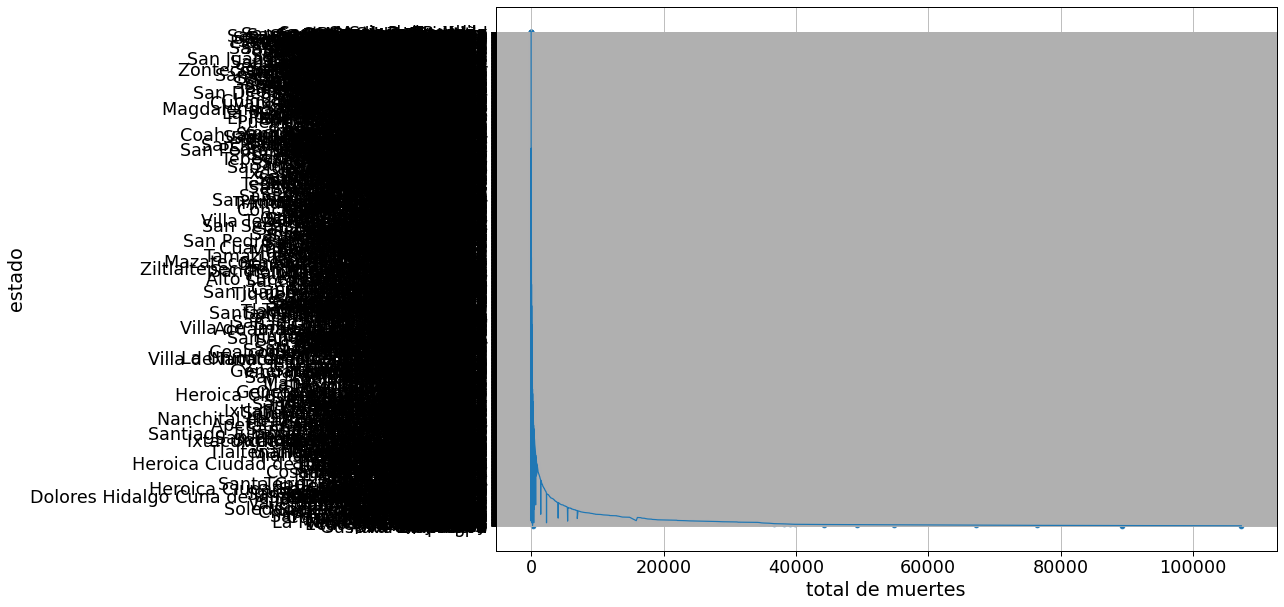

In [24]:
fig = plt.figure(figsize=(14,10))
plt.scatter(dfcases['total'],dfcases['nombre'])
plt.plot(dfcases['total'],dfcases['nombre'])
plt.xlabel('total de muertes')
plt.ylabel('estado')
plt.grid()


In [25]:
dfcases.keys()

Index(['cve_ent', 'poblacion', 'nombre', '31-12-2019', '01-01-2020',
       '02-01-2020', '03-01-2020', '04-01-2020', '05-01-2020', '06-01-2020',
       ...
       '14-06-2021', '15-06-2021', '16-06-2021', '17-06-2021', '18-06-2021',
       '19-06-2021', '20-06-2021', '21-06-2021', 'total', 'rates'],
      dtype='object', length=544)

In [26]:
X = dfcases.iloc[:,:-1].values  #independent variable array
y = dfcases.iloc[:,1].values  #dependent variable vector

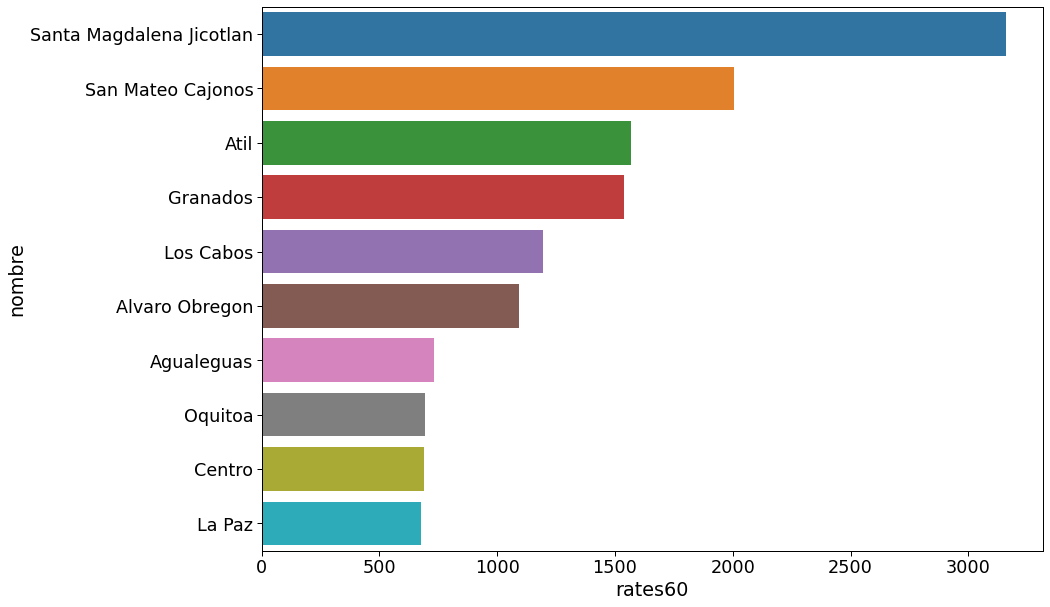

In [27]:
dfcases['total60']= dfcases.iloc[:, b -59 : b ].sum(axis=1)
dfcases['rates60'] = (dfcases['total60']/dfcases['poblacion'])*100000
dfcases
plt.figure(figsize=(14,10))
sns.barplot(x="rates60", y="nombre", data=dfcases.nlargest(10, 'rates60'))
sns.set_context('paper', font_scale=2)

In [28]:
dfAll = pd.merge(dfcases,dfdeaths,on='nombre')
dfAll

,cve_ent_x,poblacion_x,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,14-06-2021_y,15-06-2021_y,16-06-2021_y,17-06-2021_y,18-06-2021_y,19-06-2021_y,total_y,rates_y,total60_y,rates60_y
0,9007,1815551,Iztapalapa,0,0,0,0,0,0,0,...,0,0,0,1,0,0,6904,380.270232,140,7.711158
1,9010,755537,Alvaro Obregon,0,0,0,0,0,0,0,...,0,0,1,2,0,0,2902,384.097668,59,7.809015
2,9010,755537,Alvaro Obregon,0,0,0,0,0,0,0,...,0,0,0,0,0,0,23,100.414757,1,4.365859
3,16003,22905,Alvaro Obregon,0,0,0,0,0,0,0,...,0,0,1,2,0,0,2902,384.097668,59,7.809015
4,16003,22905,Alvaro Obregon,0,0,0,0,0,0,0,...,0,0,0,0,0,0,23,100.414757,1,4.365859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,20119,391,San Bartolome Yucuañe,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0.000000
2915,20228,843,San Lorenzo Cuaunecuiltitla,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0.000000
2916,20503,402,Santiago Zoochila,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0.000000
2917,20336,1819,San Pedro Yolox,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0.000000


In [29]:
dfAll.head().loc[:, ['nombre', 'total_x', 'rates_x', 'total60_x', 'rates60_x', 'total_y', 'rates_y', 'total60_y', 'rates60_y']]

,nombre,total_x,rates_x,total60_x,rates60_x,total_y,rates_y,total60_y,rates60_y
0,Iztapalapa,107269,5908.344078,4352,239.706844,6904,380.270232,140,7.711158
1,Alvaro Obregon,89264,11814.643095,8269,1094.453349,2902,384.097668,59,7.809015
2,Alvaro Obregon,89264,11814.643095,8269,1094.453349,23,100.414757,1,4.365859
3,Alvaro Obregon,212,925.562104,2,8.731718,2902,384.097668,59,7.809015
4,Alvaro Obregon,212,925.562104,2,8.731718,23,100.414757,1,4.365859


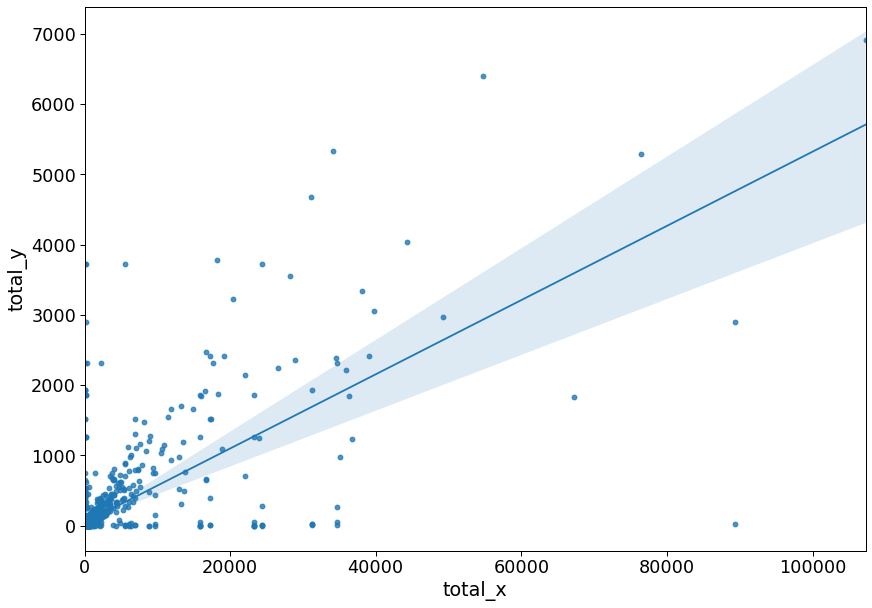

In [30]:
plt.figure(figsize=(14,10))
sns.regplot(x="total_x", y="total_y", data=dfAll)
sns.set_context('paper', font_scale=2)